In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50
import tensorflow as tf
import tensorflow.keras.layers as tfl
import numpy as np
from sklearn.model_selection import train_test_split

### Loading the data

In [2]:
new_data = np.load("Data.npy")
labels = np.load("Labels.npy")
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(new_data, labels, test_size=0.2)
X_train_new = X_train_new - X_train_new.mean(axis=0) 
X_test_new = X_test_new - X_test_new.mean(axis=0) 
X_test_new = X_test_new / X_test_new.std(axis=0) 
X_train_new = X_train_new / X_train_new.std(axis=0) 

X_train_new.mean(axis=0).shape

(128, 128, 3)

### Training

In [3]:
base_model = ResNet50(weights='imagenet',include_top=False, input_shape=(128,128,3))
base_model.trainable = False

inputs = tf.keras.Input(shape=(128,128,3))
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tfl.Flatten()(x)
x = tfl.Dense(1024, activation='relu')(x)
x = tfl.Dense(256, activation='relu')(x)
outputs = tfl.Dense(4, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'], loss=tf.keras.losses.SparseCategoricalCrossentropy())

epochs = 100
batch_size = 32

history = model.fit(X_train_new, y_train_new, epochs=epochs, batch_size = batch_size, verbose = 1, validation_data=(X_test_new, y_test_new))

Epoch 1/100
176/176 [==============================] - 31s 137ms/step - loss: 1.1098 - accuracy: 0.7312 - val_loss: 0.5458 - val_accuracy: 0.7915
Epoch 2/100
176/176 [==============================] - 21s 118ms/step - loss: 0.3754 - accuracy: 0.8569 - val_loss: 0.3894 - val_accuracy: 0.8356
Epoch 3/100
176/176 [==============================] - 20s 116ms/step - loss: 0.3204 - accuracy: 0.8791 - val_loss: 0.3543 - val_accuracy: 0.8690
Epoch 4/100
176/176 [==============================] - 20s 114ms/step - loss: 0.2773 - accuracy: 0.8934 - val_loss: 0.3614 - val_accuracy: 0.8712
Epoch 5/100
176/176 [==============================] - 20s 115ms/step - loss: 0.2212 - accuracy: 0.9128 - val_loss: 0.3249 - val_accuracy: 0.8811
Epoch 6/100
176/176 [==============================] - 20s 113ms/step - loss: 0.2013 - accuracy: 0.9213 - val_loss: 0.3241 - val_accuracy: 0.8925
Epoch 7/100
176/176 [==============================] - 20s 113ms/step - loss: 0.2052 - accuracy: 0.9258 - val_loss: 0.3884 -

In [4]:
acc = model.evaluate(X_test_new, y_test_new, verbose = 1)
print(f"Best accuracy achieved = {acc[1]*100}")
print( np.argmax(model.predict(X_test_new, batch_size = 1), axis = 1))

44/44 [==============================] - 4s 92ms/step - loss: 0.6051 - accuracy: 0.9153 0s - loss: 0.683
Best accuracy achieved = 91.53025150299072
[1 3 3 ... 0 0 0]


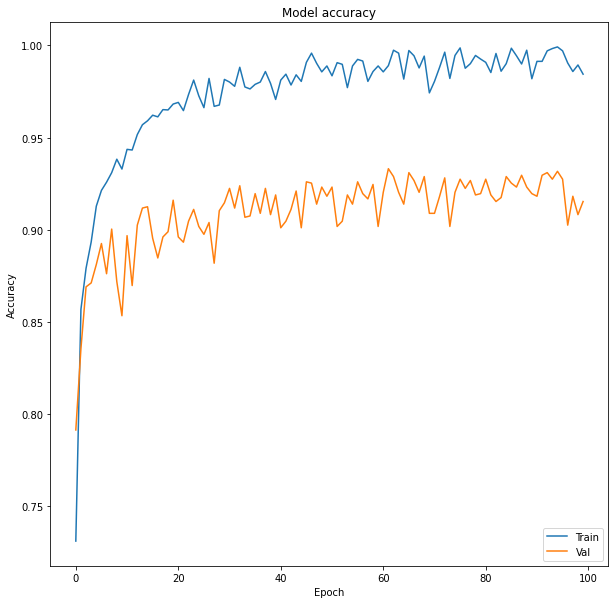

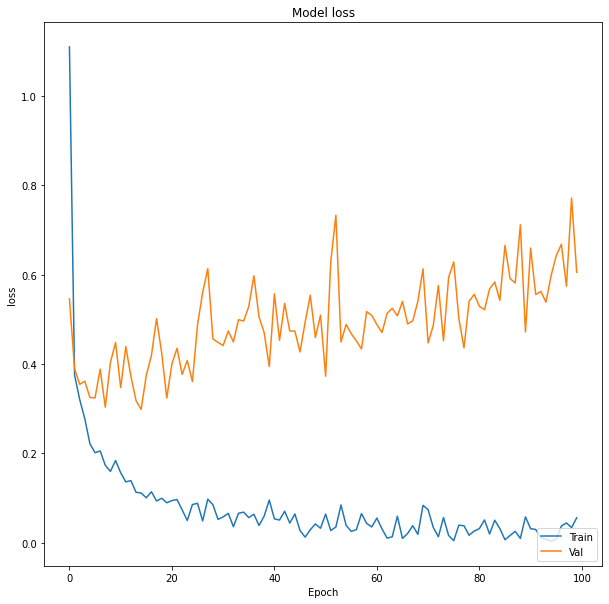

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize =(10,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')

plt.figure(figsize =(10,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')


plt.show()
